In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [ ]:
df=pd.read_csv('language.csv')

In [ ]:
df.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [ ]:
df.isnull().sum()

,0
Text,0
language,0


In [ ]:
df["language"].value_counts()

,count
language,
Estonian,1000
Swedish,1000
Thai,1000
Tamil,1000
Dutch,1000
Japanese,1000
Turkish,1000
Latin,1000
Urdu,1000


<Axes: xlabel='language'>

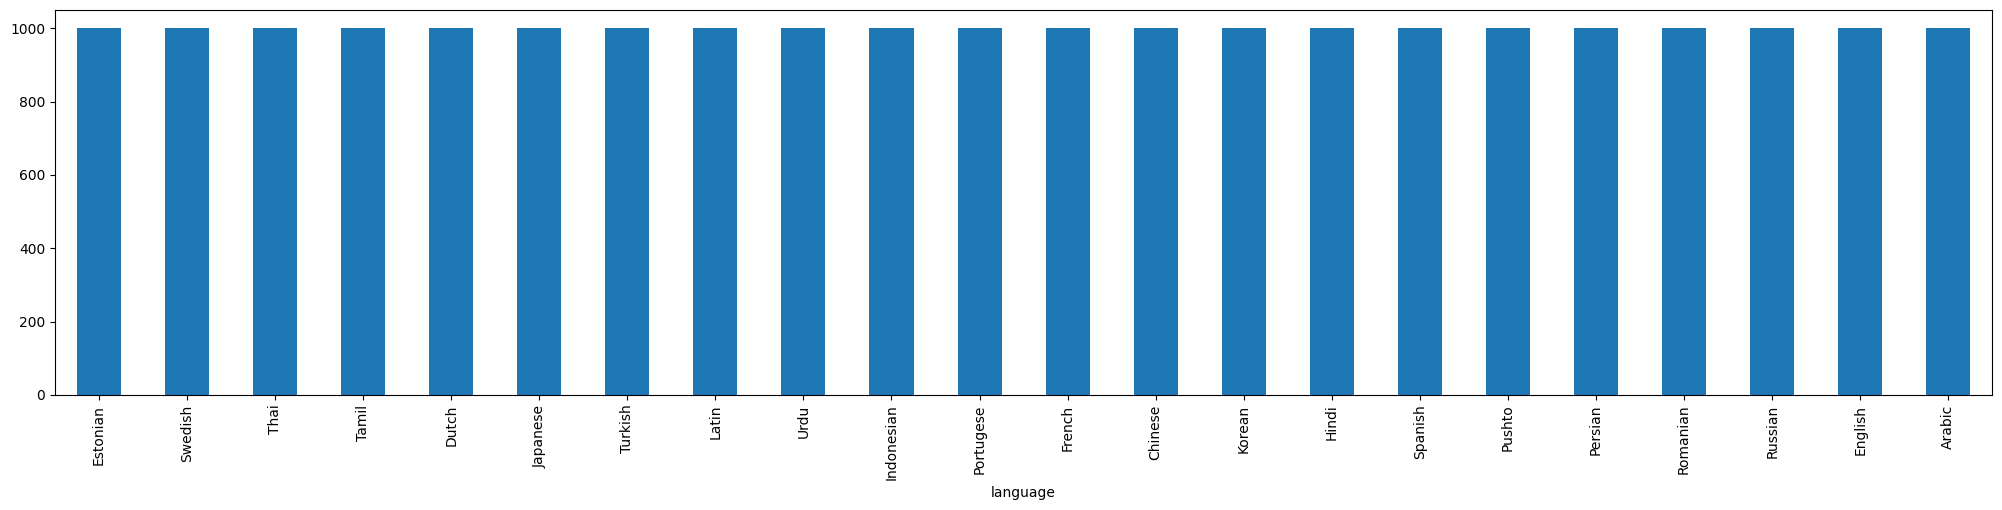

In [ ]:
plt.figure(figsize=(25,5))
df['language'].value_counts().plot.bar()

In [ ]:
df.describe()

,Text,language
count,22000,22000
unique,21859,22
top,haec commentatio automatice praeparata res ast...,Estonian
freq,48,1000


In [ ]:
#le = LabelEncoder()
#df['language'] = le.fit_transform(df['language'])

In [ ]:
df['language'].unique()

array(['Estonian', 'Swedish', 'Thai', 'Tamil', 'Dutch', 'Japanese',
       'Turkish', 'Latin', 'Urdu', 'Indonesian', 'Portugese', 'French',
       'Chinese', 'Korean', 'Hindi', 'Spanish', 'Pushto', 'Persian',
       'Romanian', 'Russian', 'English', 'Arabic'], dtype=object)

In [ ]:
df_encoded = pd.get_dummies(df, columns=['language'])

In [ ]:
x=df['Text']
y=df['language']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model = make_pipeline(CountVectorizer(), MultinomialNB())

In [ ]:
model.fit(x_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [ ]:
print("Model Accuracy:", model.score(x_test, y_test))

Model Accuracy: 0.9422727272727273


In [ ]:
user_input = input("Enter a sentence: ")
print("Predicted Language:",model.predict([user_input]))


Enter a sentence: #$%%$#
Predicted Language: ['Swedish']


In [ ]:
#मेरा नाम रजा है
#je m'appelle Raza : frence
# : rusian
#ฉันชื่อราซ่า : thai
#내 이름은 라자야: korean
#मेरा नाम रजा है
#:urdu  میرا نام رضا ہے۔